## **Align Guard Internship**

**Classification of Physiotherapy Exercises**

* Created By : Blessy louis
* Email: blessylouis2002@gmail.com
* Created On: 22.06.2024



---


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load Dataset

### MEx Multi-modal Exercise Dataset Description

The MEx Multi-modal Exercise dataset is designed for analyzing physiotherapy exercises. It contains data from 30 subjects performing seven different exercises, recorded using multiple sensors.

#### Exercises:
1. **Knee-rolling**
   - **Starting Position:** Lying on back, knees together and bent, feet flat on the floor.
   - **Action:** Slowly roll knees to the right, back to the center, then to the left, keeping the upper trunk still.
   - **Repetitions:** 60 seconds.

2. **Bridging**
   - **Starting Position:** Lying on back with knees bent and slightly apart, feet flat on the floor, arms by the side.
   - **Action:** Squeeze buttock muscles and lift hips off the floor. Hold for approximately 5 seconds, then lower slowly.
   - **Repetitions:** 60 seconds.

3. **Pelvic tilt**
   - **Starting Position:** Lying on back with knees bent and slightly apart, feet flat on the floor, arms by the side.
   - **Action:** Tighten stomach muscles and press the small of the back against the floor, letting the bottom rise. Hold for approximately 5 seconds, then relax.
   - **Repetitions:** 60 seconds.

4. **“The Clam”**
   - **Starting Position:** Lying on right side with hips and shoulders in a straight line. Bend knees so thighs are at a 90° angle. Rest head on the top arm (stretched overhead or bent). Bend top arm and place hand on the floor for stability. Stack hips and shoulders directly on top of each other.
   - **Action:** Keep big toes together and slowly rotate leg in hip socket so the top knee opens. Open knee as far as possible without disturbing hip alignment, then slowly return to the starting position.
   - **Repetitions:** 30 seconds on the right side, then 30 seconds on the left.

5. **Repeated Extension in Lying**
   - **Starting Position:** Lying face down, place palms on the floor, elbows under shoulders (press-up position).
   - **Action:** Straighten elbows as far as possible and push the top half of the body up as far as possible. Pelvis, hips, and legs must stay relaxed. Maintain position for approximately 2 seconds, then slowly lower to the starting position.
   - **Repetitions:** 60 seconds.

6. **Prone punches**
   - **Starting Position:** On all fours with hands directly beneath shoulders, knees slightly apart, and straight back. Arch and dip back to find a neutral position between the two extremes.
   - **Action:** Punch right arm in front and lower to the floor. Repeat with the left arm, keeping the trunk as still as possible.
   - **Repetitions:** 60 seconds.

7. **“Superman”**
   - **Starting Position:** On all fours with hands directly beneath shoulders, knees slightly apart, and straight back. Arch and dip back to find a neutral position between the two extremes.
   - **Action:** Extend right arm straight in front and left leg straight behind, keeping the trunk as still as possible. Hold for approximately 5 seconds, then lower and repeat with the other arm and leg.
   - **Repetitions:** 60 seconds.

#### Sensors and Specifications:
1. **Obbrec Astra Depth Camera:**
   - **Sampling Frequency:** 15 Hz
   - **Frame Size:** 240x320 pixels (downscaled to 12x16)

2. **Sensing Tex Pressure Mat:**
   - **Sampling Frequency:** 15 Hz
   - **Frame Size:** 32x16 cells

3. **Axivity AX3 3-Axis Logging Accelerometer:**
   - **Sampling Frequency:** 100 Hz
   - **Range:** ±8g
   - **Placement:** Worn on the wrist and thigh

#### Data Structure:
The dataset is organized into a hierarchical structure with separate folders for each sensor and each subject.

**Folder Structure:**
- `MEx/`
  - `accelerometer/`
    - `subject_1/`
      - `exercise_1_act.csv`
      - `exercise_1_acw.csv`
      - ...
    - `subject_2/`
    - ...
  - `pressure_mat/`
    - `subject_1/`
      - `exercise_1_pm.csv`
      - ...
    - ...
  - `depth_camera/`
    - `subject_1/`
      - `exercise_1_dc.csv`
      - ...
    - ...

**Data Files:**
Each data file corresponds to a specific exercise performed by a subject and contains timestamped sensory data. The file naming convention typically follows the format `exerciseID_sensorType.csv`, where `sensorType` indicates the type of sensor data (e.g., act, acw, pm, dc).

#### Attribute Information:

1. **Accelerometer Data Files (act and acw):**
   - **Timestamp**
   - **X-axis value**
   - **Y-axis value**
   - **Z-axis value**
   - **Min value:** -8
   - **Max value:** +8

2. **Pressure Mat Data Files (pm):**
   - **Timestamp**
   - **Data Frame:** 32x16 cells
   - **Min value:** 0
   - **Max value:** 1

3. **Depth Camera Data Files (dc):**
   - **Timestamp**
   - **Data Frame:** 12x16 pixels
   - **Min value:** 0
   - **Max value:** 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

# Define the path to your dataset in Google Drive
base_path = '/content/drive/MyDrive/archive (5)/MEx'

# Initialize empty lists to store data for each sensor
acc1_data = []
acc2_data = []
pressure_data = []
depth_data = []

# Function to read CSV files without headers and append to the list
def load_csv_files(sensor_path, data_list):
    subjects = os.listdir(sensor_path)
    for subject in subjects:
        subject_path = os.path.join(sensor_path, subject)
        if os.path.isdir(subject_path):
            files = os.listdir(subject_path)
            for file in files:
                if file.endswith('.csv'):
                    file_path = os.path.join(subject_path, file)
                    df = pd.read_csv(file_path, header=None)
                    data_list.append(df)

# Load Accelerometer 1 data
acc1_path = os.path.join(base_path, 'act')
load_csv_files(acc1_path, acc1_data)

# Load Accelerometer 2 data
acc2_path = os.path.join(base_path, 'acw')
load_csv_files(acc2_path, acc2_data)

# Load Pressure Mat data
pressure_path = os.path.join(base_path, 'pm_1.0_1.0')
load_csv_files(pressure_path, pressure_data)

# Load Depth Camera data
depth_path = os.path.join(base_path, 'dc_0.05_0.05')
load_csv_files(depth_path, depth_data)

# Create DataFrames by concatenating data vertically
df_acc1 = pd.concat(acc1_data, axis=0, ignore_index=True)
df_acc2 = pd.concat(acc2_data, axis=0, ignore_index=True)
df_pressure = pd.concat(pressure_data, axis=0, ignore_index=True)
df_depth = pd.concat(depth_data, axis=0, ignore_index=True)

# Display the shapes of the DataFrames
print('Accelerometer 1 DataFrame Shape:', df_acc1.shape)
print('Accelerometer 2 DataFrame Shape:', df_acc2.shape)
print('Pressure Mat DataFrame Shape:', df_pressure.shape)
print('Depth Camera DataFrame Shape:', df_depth.shape)


Accelerometer 1 DataFrame Shape: (1400856, 4)
Accelerometer 2 DataFrame Shape: (1313695, 4)
Pressure Mat DataFrame Shape: (202682, 513)
Depth Camera DataFrame Shape: (140694, 193)


In [ ]:
df_acc1.head()

,0,1,2,3
0,2019-03-26 16:31:30.138000,0.656250,0.593750,-0.312500
1,2019-03-26 16:31:30.147000,0.671875,0.593750,-0.312500
2,2019-03-26 16:31:30.157000,0.671875,0.593750,-0.296875
3,2019-03-26 16:31:30.166000,0.671875,0.593750,-0.296875
4,2019-03-26 16:31:30.176000,0.671875,0.578125,-0.328125


# EDA

In [ ]:
# Display data types of each dataframe
print("DataFrame dtypes:")
print("df_acc1:")
print(df_acc1.dtypes)
print("\ndf_acc2:")
print(df_acc2.dtypes)
print("\ndf_pressure:")
print(df_pressure.dtypes)
print("\ndf_depth:")
print(df_depth.dtypes)


DataFrame dtypes:
df_acc1:
0     object
1    float64
2    float64
3    float64
dtype: object

df_acc2:
0     object
1    float64
2    float64
3    float64
dtype: object

df_pressure:
0       object
1      float64
2      float64
3      float64
4      float64
        ...   
508    float64
509    float64
510    float64
511    float64
512    float64
Length: 513, dtype: object

df_depth:
0       object
1      float64
2      float64
3      float64
4      float64
        ...   
188    float64
189    float64
190    float64
191    float64
192    float64
Length: 193, dtype: object


In [ ]:
# Display info of each dataframe
print("DataFrame Info:")
print("df_acc1:")
print(df_acc1.info())
print("\ndf_acc2:")
print(df_acc2.info())
print("\ndf_pressure:")
print(df_pressure.info())
print("\ndf_depth:")
print(df_depth.info())


DataFrame Info:
df_acc1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400856 entries, 0 to 1400855
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1400856 non-null  object 
 1   1       1400856 non-null  float64
 2   2       1400856 non-null  float64
 3   3       1400856 non-null  float64
dtypes: float64(3), object(1)
memory usage: 42.8+ MB
None

df_acc2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313695 entries, 0 to 1313694
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1313695 non-null  object 
 1   1       1313695 non-null  float64
 2   2       1313695 non-null  float64
 3   3       1313695 non-null  float64
dtypes: float64(3), object(1)
memory usage: 40.1+ MB
None

df_pressure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202682 entries, 0 to 202681
Columns: 513 entries, 0 to 512
dtypes: float64(512), object(1)
me

In [ ]:
# Display summary statistics of each dataframe
print("Summary Statistics:")
print("df_acc1:")
print(df_acc1.describe())
print("\ndf_acc2:")
print(df_acc2.describe())
print("\ndf_pressure:")
print(df_pressure.describe())
print("\ndf_depth:")
print(df_depth.describe())


Summary Statistics:
df_acc1:
                  1             2             3
count  1.400856e+06  1.400856e+06  1.400856e+06
mean  -3.640429e-02  1.167158e-02 -6.672829e-03
std    6.219657e-01  5.933810e-01  4.388598e-01
min   -3.453125e+00 -5.578125e+00 -5.437500e+00
25%   -5.781250e-01 -5.000000e-01 -2.343750e-01
50%   -4.687500e-02 -1.562500e-02  1.562500e-02
75%    5.625000e-01  5.937500e-01  2.031250e-01
max    2.984375e+00  1.656250e+00  4.187500e+00

df_acc2:
                  1             2             3
count  1.313695e+06  1.313695e+06  1.313695e+06
mean  -4.360104e-02 -2.695537e-02 -1.543200e-01
std    5.182060e-01  5.667184e-01  6.314961e-01
min   -8.000000e+00 -8.000000e+00 -6.078125e+00
25%   -4.375000e-01 -4.218750e-01 -7.500000e-01
50%   -7.812500e-02  0.000000e+00 -2.812500e-01
75%    3.750000e-01  1.875000e-01  4.062500e-01
max    7.984375e+00  7.984375e+00  7.984375e+00

df_pressure:
                 1              2              3              4    \
count  202682.

In [ ]:
# Display missing values count of each dataframe
print("Missing Values:")
print("df_acc1:")
print(df_acc1.isnull().sum())
print("\ndf_acc2:")
print(df_acc2.isnull().sum())
print("\ndf_pressure:")
print(df_pressure.isnull().sum())
print("\ndf_depth:")
print(df_depth.isnull().sum())


Missing Values:
df_acc1:
0    0
1    0
2    0
3    0
dtype: int64

df_acc2:
0    0
1    0
2    0
3    0
dtype: int64

df_pressure:
0      0
1      0
2      0
3      0
4      0
      ..
508    0
509    0
510    0
511    0
512    0
Length: 513, dtype: int64

df_depth:
0      0
1      0
2      0
3      0
4      0
      ..
188    0
189    0
190    0
191    0
192    0
Length: 193, dtype: int64


In [ ]:
# Display duplicated rows count of each dataframe
print("Duplicated Rows:")
print("df_acc1:")
print(df_acc1.duplicated().sum())
print("\ndf_acc2:")
print(df_acc2.duplicated().sum())
print("\ndf_pressure:")
print(df_pressure.duplicated().sum())
print("\ndf_depth:")
print(df_depth.duplicated().sum())


Duplicated Rows:
df_acc1:
0

df_acc2:
0

df_pressure:
10

df_depth:
0


In [ ]:
# Remove duplicates from df_pressure
df_pressure_cleaned = df_pressure.drop_duplicates()

# Verify if duplicates are removed
print("Duplicates before removal:", df_pressure.duplicated().sum())
print("Duplicates after removal:", df_pressure_cleaned.duplicated().sum())


Duplicates before removal: 10
Duplicates after removal: 0


In [ ]:
import warnings
warnings.filterwarnings('ignore')
def detect_outliers_iqr(df):
    """
    Detect outliers in a dataframe using Interquartile Range (IQR) method for numeric columns.

    Parameters:
    df (DataFrame): Input dataframe to detect outliers.

    Returns:
    dict: A dictionary where keys are column names and values are counts of outliers.
    """
    outliers_dict = {}

    # Iterate through columns
    for column in df.columns:
        try:
            # Convert column to numeric (ignore errors for non-numeric columns)
            df[column] = pd.to_numeric(df[column], errors='coerce')

            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Determine outliers using IQR
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_dict[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

        except Exception as e:
            print(f"Error processing column {column}: {str(e)}")
            outliers_dict[column] = np.nan

    return outliers_dict

# Example usage with your dataframes
dataframes = {
    'df_acc1': df_acc1,
    'df_acc2': df_acc2,
    'df_pressure': df_pressure_cleaned,
    'df_depth': df_depth
}

# Iterate through each dataframe and detect outliers
for name, df in dataframes.items():
    print(f"Outliers in {name}:")
    outliers = detect_outliers_iqr(df)
    print(outliers)
    print()


Outliers in df_acc1:
{0: 0, 1: 16, 2: 7, 3: 147882}

Outliers in df_acc2:
{0: 0, 1: 774, 2: 5222, 3: 154}

Outliers in df_pressure:
{0: 0, 1: 32352, 2: 40812, 3: 31023, 4: 8441, 5: 34657, 6: 5513, 7: 22445, 8: 6778, 9: 5315, 10: 2598, 11: 2790, 12: 1337, 13: 2075, 14: 40058, 15: 35968, 16: 36534, 17: 31920, 18: 30995, 19: 26424, 20: 20431, 21: 31048, 22: 10020, 23: 17503, 24: 6930, 25: 2847, 26: 1423, 27: 1955, 28: 4423, 29: 11183, 30: 37740, 31: 35920, 32: 26993, 33: 32322, 34: 30082, 35: 26696, 36: 19434, 37: 31932, 38: 7991, 39: 16186, 40: 7152, 41: 2799, 42: 435, 43: 1446, 44: 4577, 45: 11190, 46: 36776, 47: 37396, 48: 27776, 49: 30263, 50: 24011, 51: 19156, 52: 17275, 53: 23874, 54: 8710, 55: 11753, 56: 4855, 57: 1752, 58: 1730, 59: 889, 60: 3996, 61: 11261, 62: 31680, 63: 29721, 64: 19567, 65: 36231, 66: 15863, 67: 43595, 68: 25760, 69: 27616, 70: 9121, 71: 12932, 72: 3809, 73: 2118, 74: 1801, 75: 728, 76: 3988, 77: 11956, 78: 33021, 79: 36409, 80: 26570, 81: 27523, 82: 29896, 83

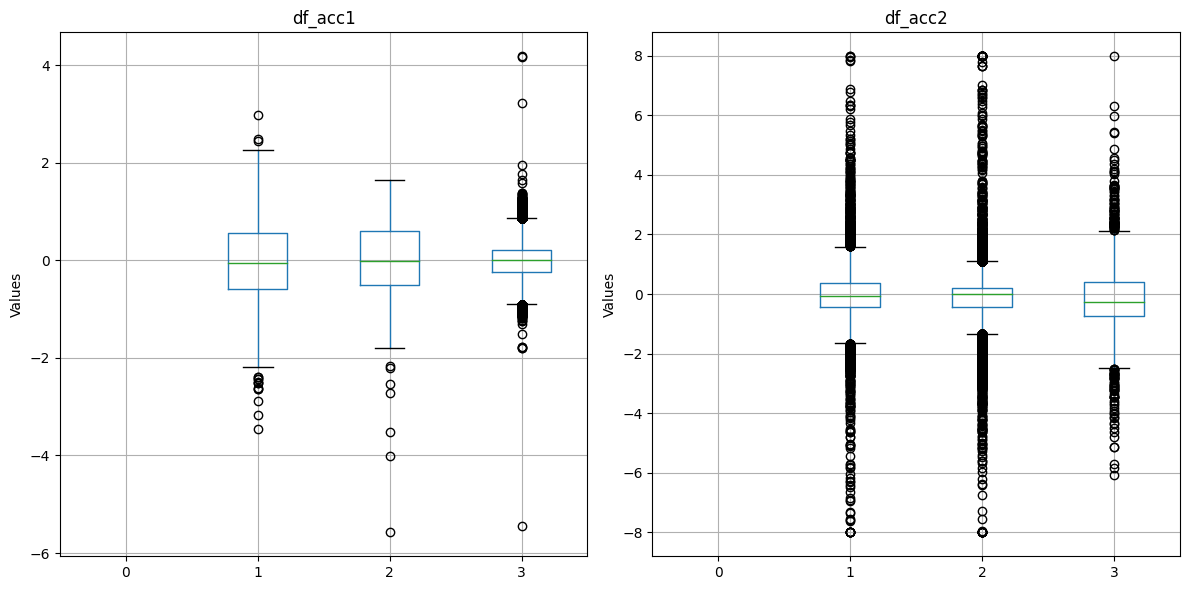

In [ ]:
# Function to plot box plots for each dataframe as subplot
def plot_boxplots_subplot(dataframe1, dataframe2, names):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot for df_acc1
    dataframe1.boxplot(ax=axes[0])
    axes[0].set_title(names[0])
    axes[0].set_ylabel("Values")
    axes[0].grid(True)

    # Plot for df_acc2
    dataframe2.boxplot(ax=axes[1])
    axes[1].set_title(names[1])
    axes[1].set_ylabel("Values")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot box plots as subplots for df_acc1 and df_acc2
plot_boxplots_subplot(df_acc1, df_acc2, ['df_acc1', 'df_acc2'])

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize


# Function to apply winsorization to a dataframe and remove outliers with count less than threshold
def winsorize_and_remove_outliers(df, outlier_threshold=10):
    # Make a copy to preserve original data
    df_cleaned = df.copy()

    # Function to count outliers
    def count_outliers(column):
        # Check if the column is numeric before calculating percentiles
        if pd.api.types.is_numeric_dtype(column):
            lower_limit = np.percentile(column, 5)
            upper_limit = np.percentile(column, 95)
            return ((column < lower_limit) | (column > upper_limit)).sum()
        else:
            return 0  # Non-numeric columns have 0 outliers

    # Remove columns with less than outlier_threshold outliers
    outlier_counts = df.apply(count_outliers)
    columns_to_remove = outlier_counts[outlier_counts < outlier_threshold].index
    df_cleaned.drop(columns_to_remove, axis=1, inplace=True)

    # Apply winsorization to remaining numeric columns and count outliers
    outliers_count = pd.Series()
    for column in df_cleaned.columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[column]):
            winsorized_data = winsorize(df_cleaned[column], limits=[0.05, 0.05])
            df_cleaned[column] = winsorized_data

            # Count outliers after winsorization
            lower_limit = np.percentile(winsorized_data, 5)
            upper_limit = np.percentile(winsorized_data, 95)
            outliers_count[column] = ((winsorized_data < lower_limit) | (winsorized_data > upper_limit)).sum()
        else:
            print(f"Skipping winsorization for non-numeric column: {column}")
            outliers_count[column] = 0  # Non-numeric columns have 0 outliers

    return df_cleaned, columns_to_remove, outliers_count

# Apply winsorization and remove outliers with count less than 10 for each dataframe
df_acc1_cleaned, removed_columns_acc1, outliers_acc1 = winsorize_and_remove_outliers(df_acc1)
df_acc2_cleaned, removed_columns_acc2, outliers_acc2 = winsorize_and_remove_outliers(df_acc2)
df_pressure_cleaned, removed_columns_pressure, outliers_pressure = winsorize_and_remove_outliers(df_pressure)
df_depth_cleaned, removed_columns_depth, outliers_depth = winsorize_and_remove_outliers(df_depth)

# Display removed columns
print("Removed columns in df_acc1:")
print(removed_columns_acc1)
print("\nRemoved columns in df_acc2:")
print(removed_columns_acc2)
print("\nRemoved columns in df_pressure:")
print(removed_columns_pressure)
print("\nRemoved columns in df_depth:")
print(removed_columns_depth)

# Display count of outliers
print("\nCount of outliers in df_acc1:")
print(outliers_acc1)
print("\nCount of outliers in df_acc2:")
print(outliers_acc2)
print("\nCount of outliers in df_pressure:")
print(outliers_pressure)
print("\nCount of outliers in df_depth:")
print(outliers_depth)

Removed columns in df_acc1:
Index([0], dtype='int64')

Removed columns in df_acc2:
Index([0], dtype='int64')

Removed columns in df_pressure:
Index([0, 248], dtype='int64')

Removed columns in df_depth:
Index([0], dtype='int64')

Count of outliers in df_acc1:
1    0
2    0
3    0
dtype: int64

Count of outliers in df_acc2:
1    0
2    0
3    0
dtype: int64

Count of outliers in df_pressure:
1      0
2      0
3      0
4      0
5      0
      ..
508    0
509    0
510    0
511    0
512    0
Length: 511, dtype: int64

Count of outliers in df_depth:
1      0
2      0
3      0
4      0
5      0
      ..
188    0
189    0
190    0
191    0
192    0
Length: 192, dtype: int64


In [ ]:
# Calculate skewness for each column in each dataframe after winsorization

# Skewness in df_acc1_cleaned
print("Skewness in df_acc1_cleaned:")
print(df_acc1_cleaned.skew())

# Skewness in df_acc2_cleaned
print("\nSkewness in df_acc2_cleaned:")
print(df_acc2_cleaned.skew())

# Skewness in df_pressure_cleaned
print("\nSkewness in df_pressure_cleaned:")
print(df_pressure_cleaned.skew())

# Skewness in df_depth_cleaned
print("\nSkewness in df_depth_cleaned:")
print(df_depth_cleaned.skew())


Skewness in df_acc1_cleaned:
1    0.006049
2   -0.117590
3   -0.049441
dtype: float64

Skewness in df_acc2_cleaned:
1    0.125263
2    0.066462
3    0.263239
dtype: float64

Skewness in df_pressure_cleaned:
1      2.314625
2      3.115174
3      3.419318
4      0.000000
5      3.244077
         ...   
508    2.246166
509    2.355988
510    2.247355
511    2.640669
512    2.617827
Length: 511, dtype: float64

Skewness in df_depth_cleaned:
1     -0.262967
2     -0.390005
3     -0.354680
4     -0.062969
5     -0.270466
         ...   
188   -0.269725
189   -0.265209
190   -0.270680
191   -0.260886
192   -0.245132
Length: 192, dtype: float64


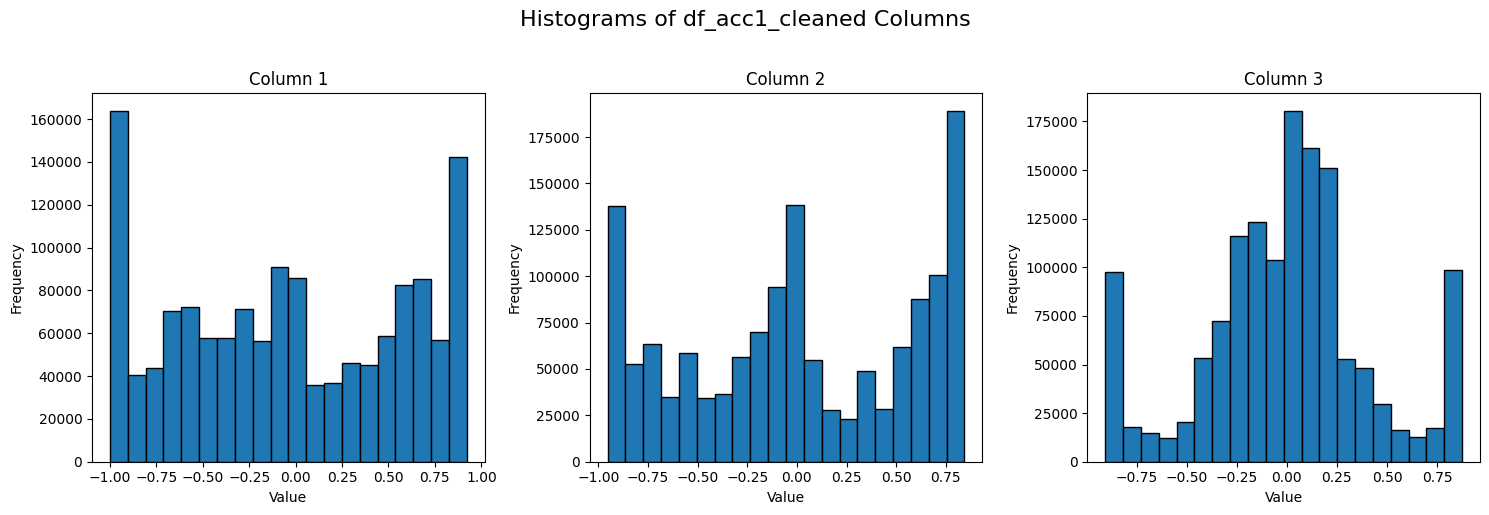

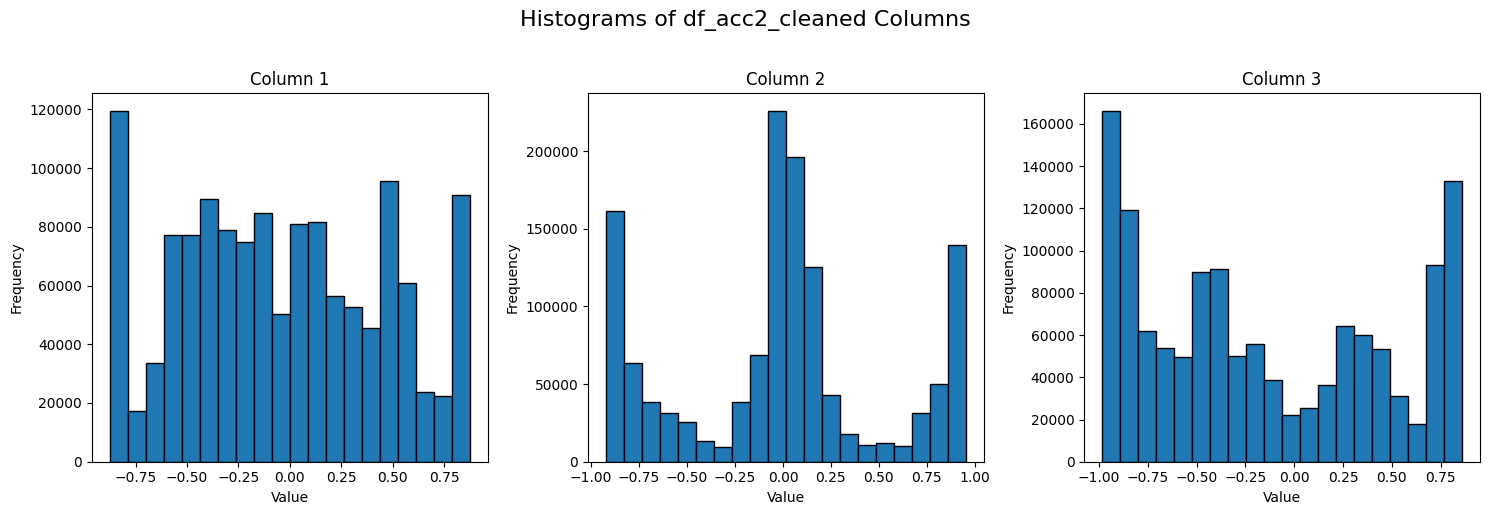

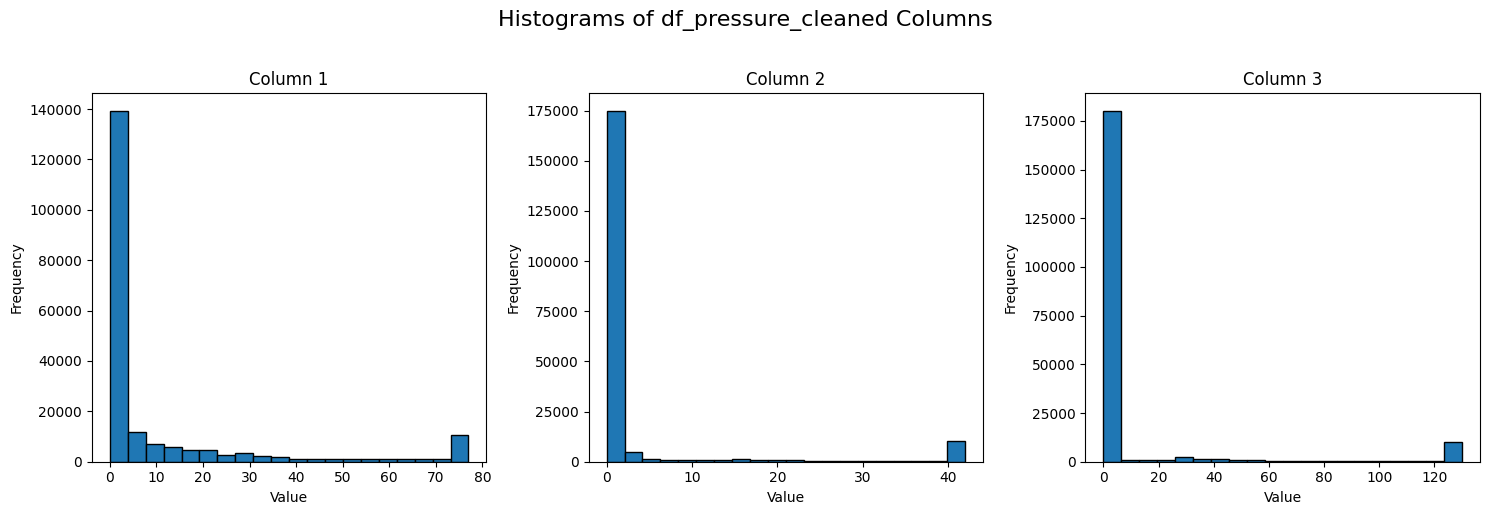

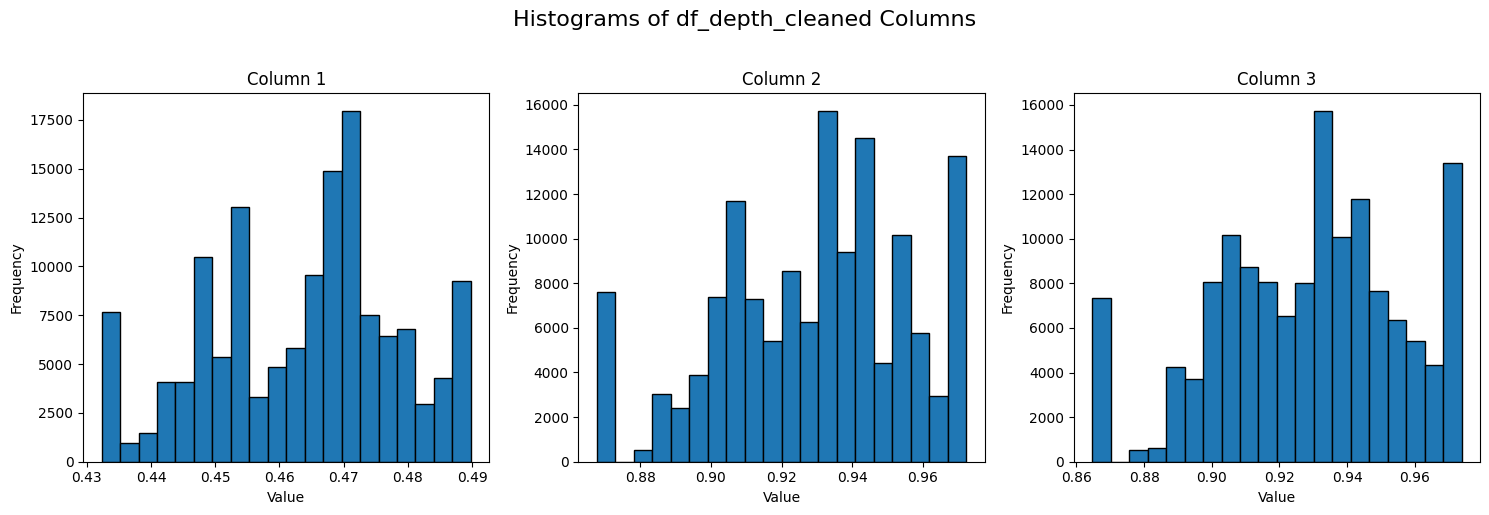

In [ ]:
import matplotlib.pyplot as plt

# Function to plot histograms for a dataframe
def plot_histograms(df, title):
    num_columns = df.shape[1]
    num_plots = min(num_columns, 3)  # Plot up to 3 histograms per row

    fig, axs = plt.subplots(1, num_plots, figsize=(15, 5))
    fig.suptitle(f'Histograms of {title} Columns', fontsize=16, y=1.02)

    for i in range(num_plots):
        axs[i].hist(df.iloc[:, i], bins=20, edgecolor='black')
        axs[i].set_title(f'Column {i+1}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot histograms for df_acc1_cleaned
plot_histograms(df_acc1_cleaned, 'df_acc1_cleaned')

# Plot histograms for df_acc2_cleaned
plot_histograms(df_acc2_cleaned, 'df_acc2_cleaned')

# Plot histograms for df_pressure_cleaned
plot_histograms(df_pressure_cleaned, 'df_pressure_cleaned')

# Plot histograms for df_depth_cleaned
plot_histograms(df_depth_cleaned, 'df_depth_cleaned')


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew

# Function to apply skewness handling transformation
def handle_skewness(df):
    df_transformed = df.copy()

    for column in df_transformed.columns:
        if pd.api.types.is_numeric_dtype(df_transformed[column]):
            col_data = df_transformed[column]
            if all(col_data > 0):  # Apply log transformation if all values are positive
                df_transformed[column] = np.log1p(col_data)  # log1p is log(1 + x)
            else:  # Apply square root transformation to non-positive values
                df_transformed[column] = np.sqrt(col_data - col_data.min() + 1)

    return df_transformed

# Function to calculate and display skewness
def display_skewness(df, title):
    skewness = df.apply(lambda x: skew(x) if pd.api.types.is_numeric_dtype(x) else 0)
    print(f"Skewness of {title} columns:")
    print(skewness)
    print("\n")

# Apply skewness handling transformation
df_acc1_transformed = handle_skewness(df_acc1_cleaned)
df_acc2_transformed = handle_skewness(df_acc2_cleaned)
df_pressure_transformed = handle_skewness(df_pressure_cleaned)
df_depth_transformed = handle_skewness(df_depth_cleaned)

# Display skewness before transformation
display_skewness(df_acc1_cleaned, "df_acc1_cleaned")
display_skewness(df_acc2_cleaned, "df_acc2_cleaned")
display_skewness(df_pressure_cleaned, "df_pressure_cleaned")
display_skewness(df_depth_cleaned, "df_depth_cleaned")

# Display skewness after transformation
display_skewness(df_acc1_transformed, "df_acc1_transformed")
display_skewness(df_acc2_transformed, "df_acc2_transformed")
display_skewness(df_pressure_transformed, "df_pressure_transformed")
display_skewness(df_depth_transformed, "df_depth_transformed")


Skewness of df_acc1_cleaned columns:
1    0.006049
2   -0.117590
3   -0.049441
dtype: float64


Skewness of df_acc2_cleaned columns:
1    0.125263
2    0.066462
3    0.263239
dtype: float64


Skewness of df_pressure_cleaned columns:
1      2.314608
2      3.115151
3      3.419293
4           NaN
5      3.244053
         ...   
508    2.246149
509    2.355970
510    2.247338
511    2.640649
512    2.617808
Length: 511, dtype: float64


Skewness of df_depth_cleaned columns:
1     -0.262964
2     -0.390001
3     -0.354676
4     -0.062968
5     -0.270463
         ...   
188   -0.269722
189   -0.265206
190   -0.270677
191   -0.260883
192   -0.245129
Length: 192, dtype: float64


Skewness of df_acc1_transformed columns:
1   -0.180445
2   -0.301565
3   -0.437045
dtype: float64


Skewness of df_acc2_transformed columns:
1   -0.095932
2   -0.227200
3    0.105642
dtype: float64


Skewness of df_pressure_transformed columns:
1      1.672414
2      2.726821
3      2.987846
4           NaN
5      2

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import yeojohnson, skew

# Function to handle skewness using Yeo-Johnson transformation
def handle_skewness_yeojohnson(df):
    df_transformed = df.copy()

    for column in df_transformed.columns:
        if pd.api.types.is_numeric_dtype(df_transformed[column]):
            col_data = df_transformed[column]
            if col_data.nunique() > 1:  # Skip transformation if data is constant
                df_transformed[column], _ = yeojohnson(col_data)
            else:
                print(f"Skipping Yeo-Johnson transformation for constant column: {column}")

    return df_transformed

# Function to calculate skewness
def calculate_skewness(df):
    return df.apply(lambda x: skew(x) if pd.api.types.is_numeric_dtype(x) else np.nan)

# Calculate skewness before transformation
skewness_before_acc1 = calculate_skewness(df_acc1_cleaned)
skewness_before_acc2 = calculate_skewness(df_acc2_cleaned)
skewness_before_pressure = calculate_skewness(df_pressure_cleaned)
skewness_before_depth = calculate_skewness(df_depth_cleaned)

# Apply skewness handling transformation using Yeo-Johnson
df_acc1_transformed = handle_skewness_yeojohnson(df_acc1_cleaned)
df_acc2_transformed = handle_skewness_yeojohnson(df_acc2_cleaned)
df_pressure_transformed = handle_skewness_yeojohnson(df_pressure_cleaned)
df_depth_transformed = handle_skewness_yeojohnson(df_depth_cleaned)

# Calculate skewness after transformation
skewness_after_acc1 = calculate_skewness(df_acc1_transformed)
skewness_after_acc2 = calculate_skewness(df_acc2_transformed)
skewness_after_pressure = calculate_skewness(df_pressure_transformed)
skewness_after_depth = calculate_skewness(df_depth_transformed)

# Combine skewness before and after into a single DataFrame for comparison
def create_comparison_table(before, after):
    comparison_df = pd.DataFrame({
        'Skewness Before': before,
        'Skewness After': after
    })
    return comparison_df

comparison_acc1 = create_comparison_table(skewness_before_acc1, skewness_after_acc1)
comparison_acc2 = create_comparison_table(skewness_before_acc2, skewness_after_acc2)
comparison_pressure = create_comparison_table(skewness_before_pressure, skewness_after_pressure)
comparison_depth = create_comparison_table(skewness_before_depth, skewness_after_depth)

# Display the comparison tables
print("Skewness Comparison for Accelerometer 1 DataFrame:")
print(comparison_acc1)
print("\nSkewness Comparison for Accelerometer 2 DataFrame:")
print(comparison_acc2)
print("\nSkewness Comparison for Pressure Mat DataFrame:")
print(comparison_pressure)
print("\nSkewness Comparison for Depth Camera DataFrame:")
print(comparison_depth)


Skipping Yeo-Johnson transformation for constant column: 4
Skipping Yeo-Johnson transformation for constant column: 6
Skipping Yeo-Johnson transformation for constant column: 8
Skipping Yeo-Johnson transformation for constant column: 9
Skipping Yeo-Johnson transformation for constant column: 10
Skipping Yeo-Johnson transformation for constant column: 11
Skipping Yeo-Johnson transformation for constant column: 12
Skipping Yeo-Johnson transformation for constant column: 13
Skipping Yeo-Johnson transformation for constant column: 22
Skipping Yeo-Johnson transformation for constant column: 24
Skipping Yeo-Johnson transformation for constant column: 25
Skipping Yeo-Johnson transformation for constant column: 26
Skipping Yeo-Johnson transformation for constant column: 27
Skipping Yeo-Johnson transformation for constant column: 28
Skipping Yeo-Johnson transformation for constant column: 38
Skipping Yeo-Johnson transformation for constant column: 40
Skipping Yeo-Johnson transformation for cons

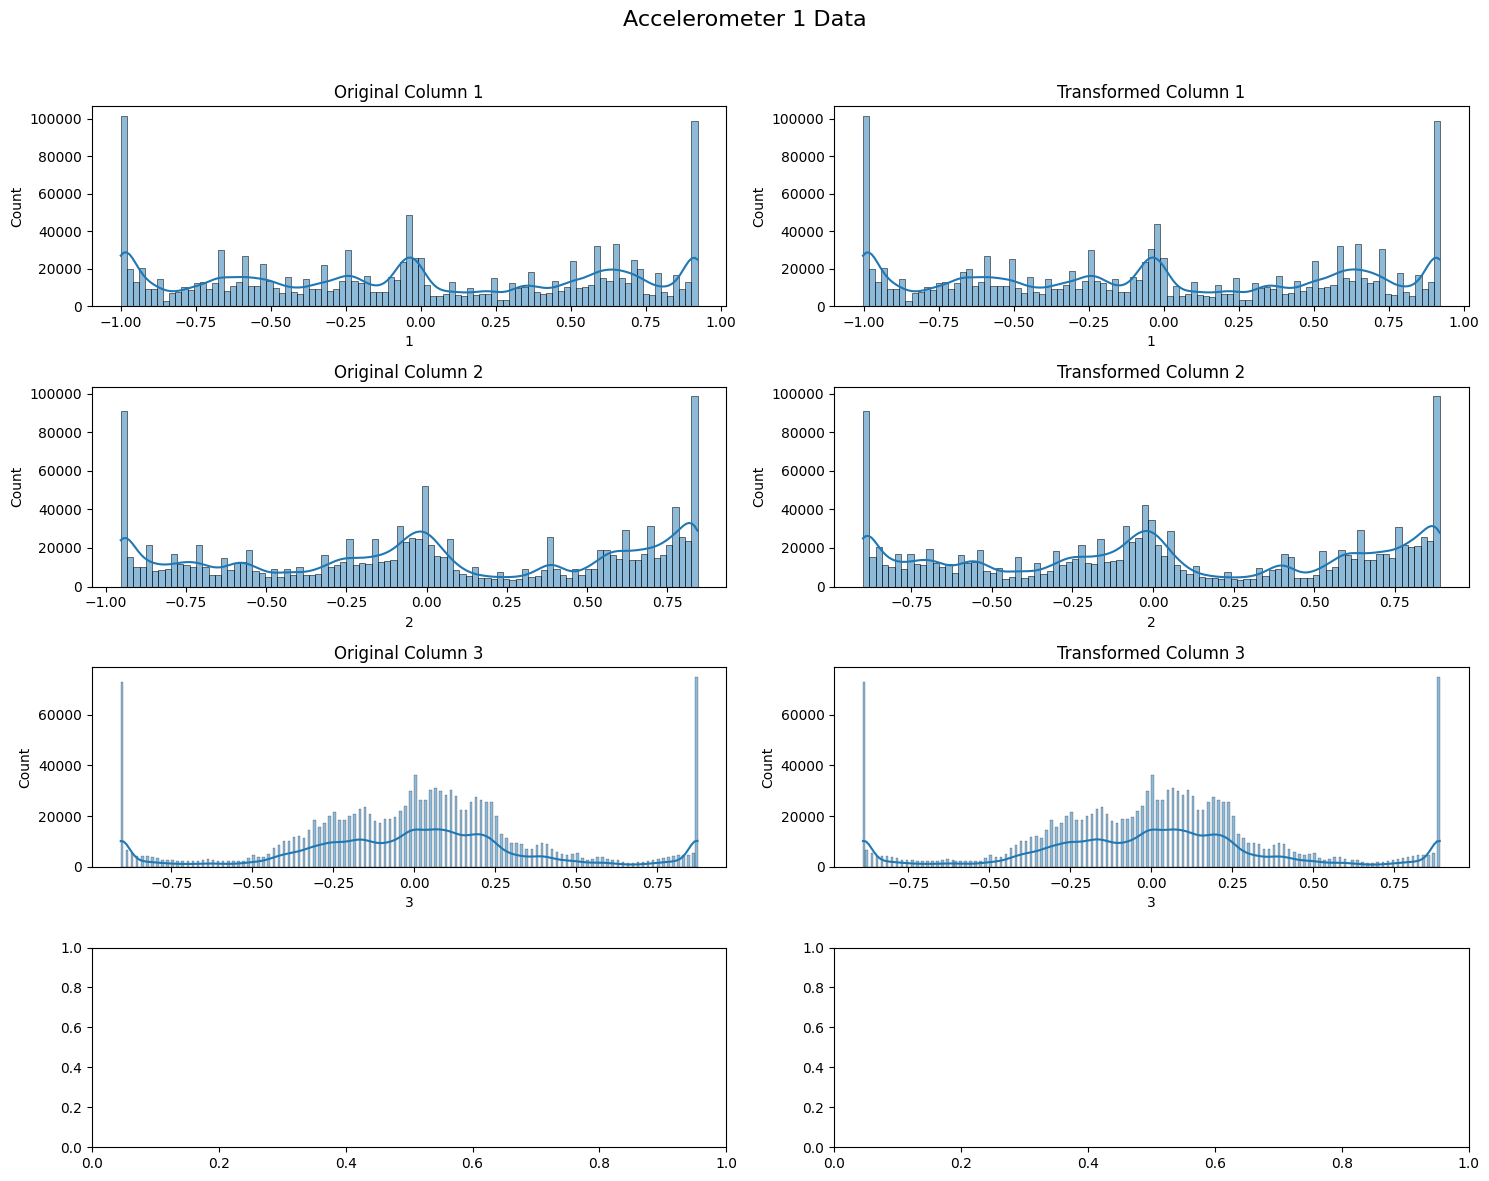

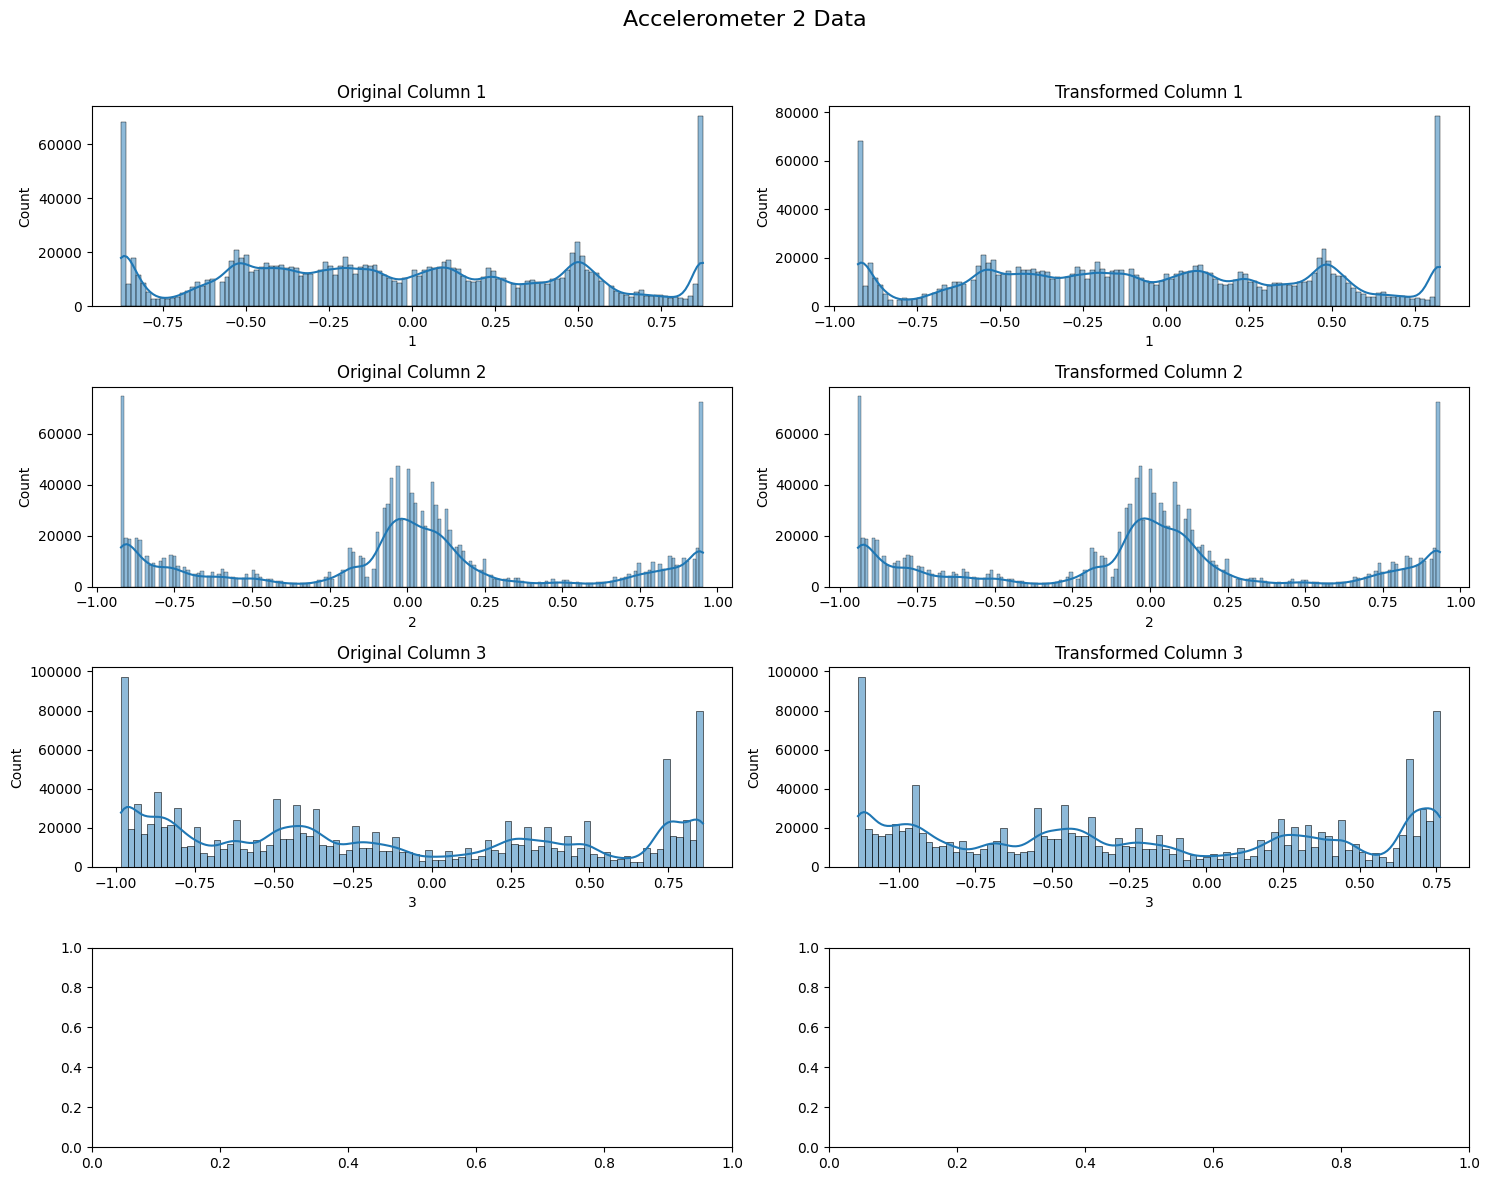

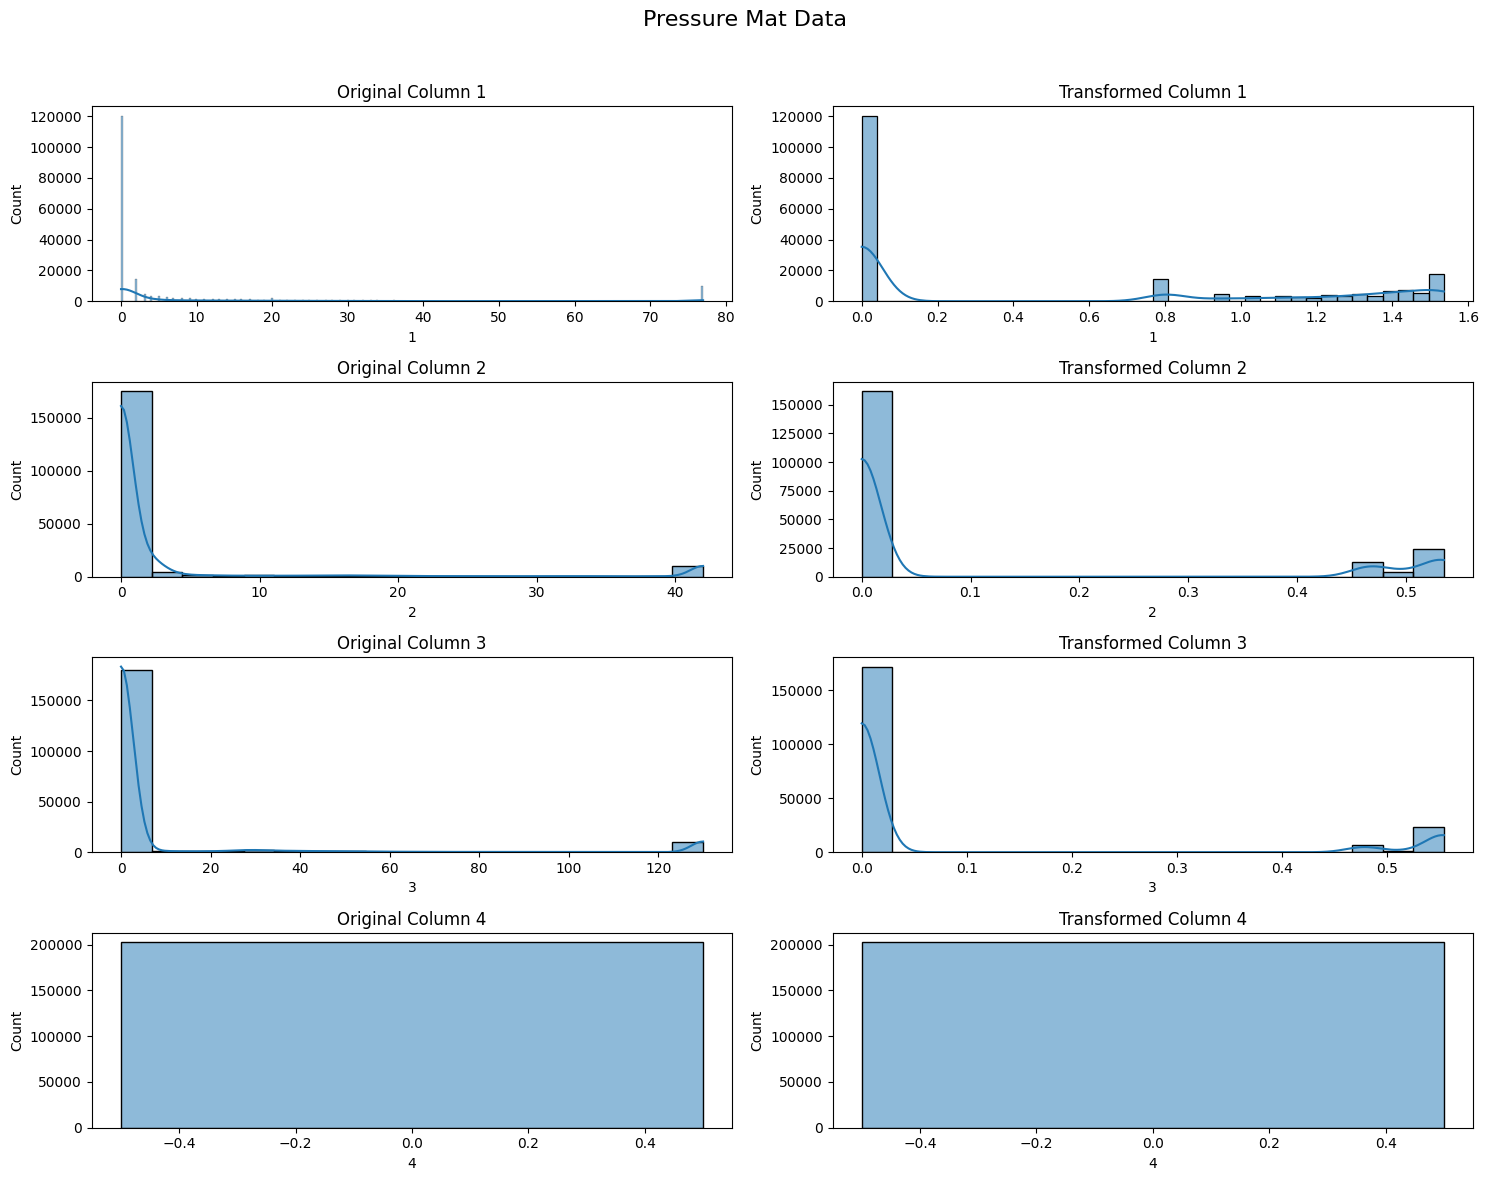

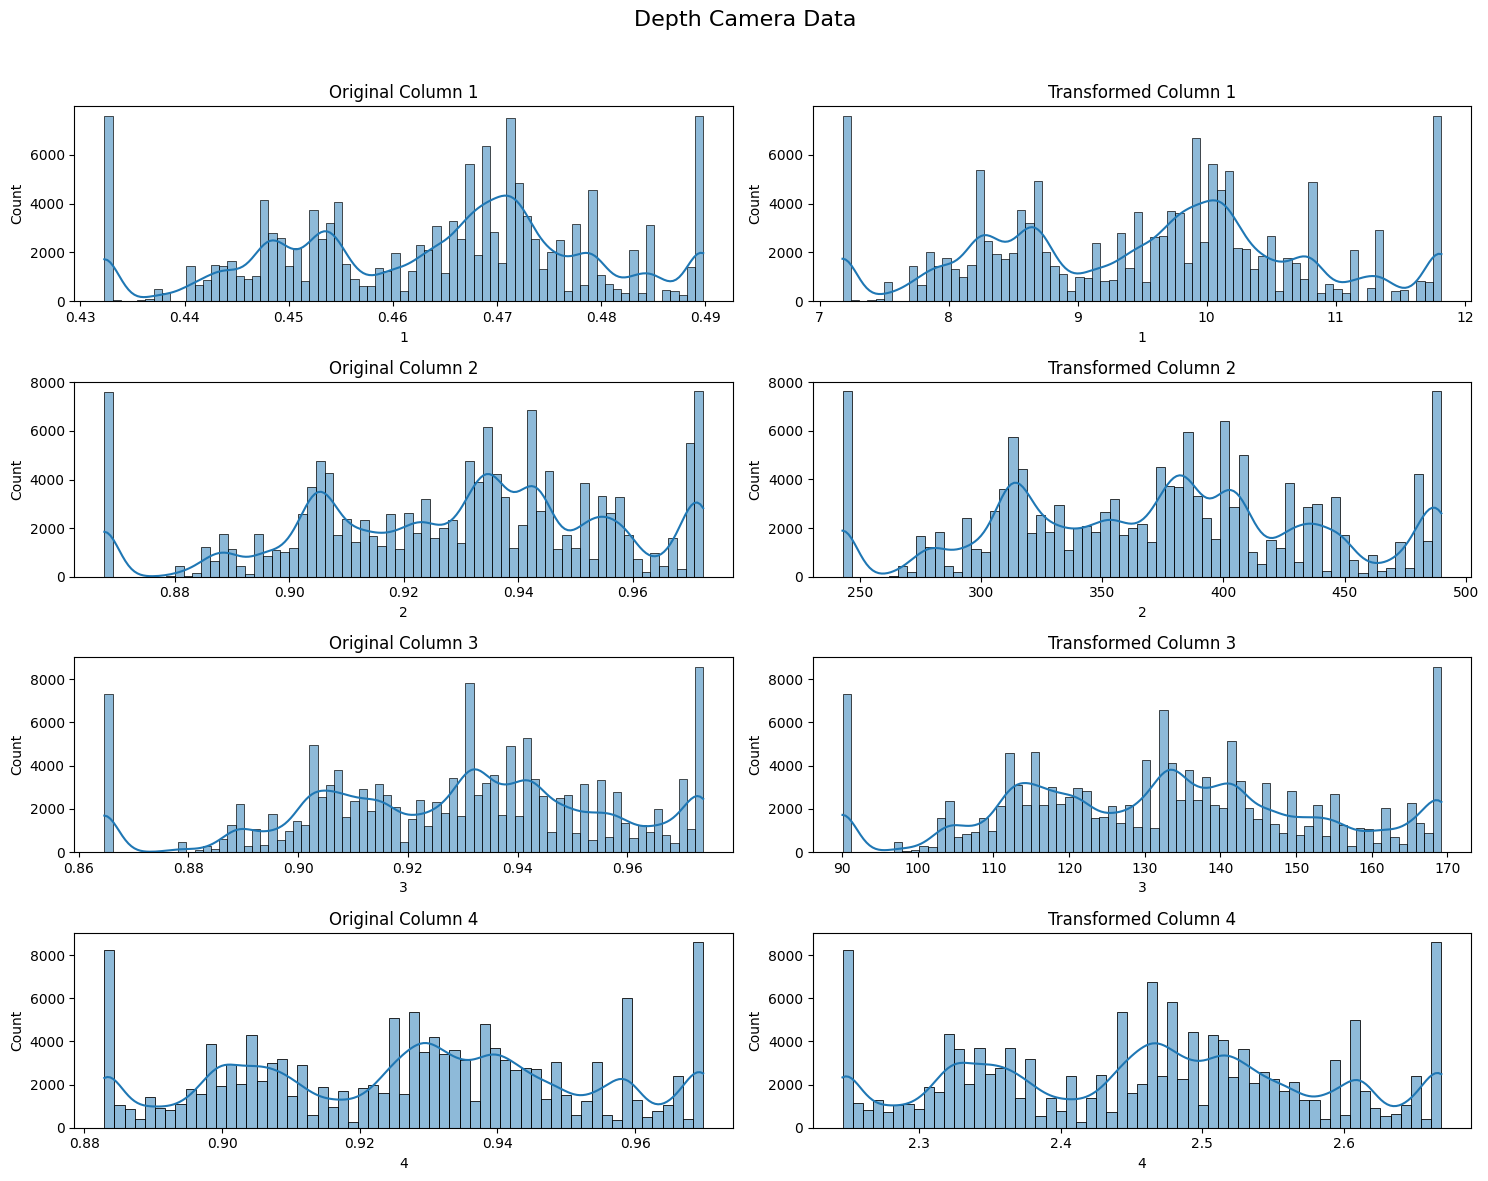

In [ ]:
# Plotting function
def plot_histograms(df_original, df_transformed, title):
    fig, axes = plt.subplots(4, 2, figsize=(15, 12))
    fig.suptitle(title, fontsize=16)

    for i in range(4):
        if i < len(df_original.columns):
            sns.histplot(df_original.iloc[:, i], ax=axes[i, 0], kde=True)
            axes[i, 0].set_title(f'Original Column {i + 1}')

            sns.histplot(df_transformed.iloc[:, i], ax=axes[i, 1], kde=True)
            axes[i, 1].set_title(f'Transformed Column {i + 1}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot histograms for the first 4 columns of each dataframe
plot_histograms(df_acc1_cleaned, df_acc1_transformed, 'Accelerometer 1 Data')
plot_histograms(df_acc2_cleaned, df_acc2_transformed, 'Accelerometer 2 Data')
plot_histograms(df_pressure_cleaned, df_pressure_transformed, 'Pressure Mat Data')
plot_histograms(df_depth_cleaned, df_depth_transformed, 'Depth Camera Data')

In [ ]:
corr_matrix_acc1 = df_acc1_transformed.corr().abs()
corr_matrix_acc2 = df_acc2_transformed.corr().abs()
corr_matrix_pressure = df_pressure_transformed.corr().abs()
corr_matrix_depth = df_depth_transformed.corr().abs()
print(corr_matrix_acc1)
print(corr_matrix_acc2)
print(corr_matrix_pressure)
print(corr_matrix_depth)


          1         2         3
1  1.000000  0.003399  0.010104
2  0.003399  1.000000  0.017097
3  0.010104  0.017097  1.000000
          1         2         3
1  1.000000  0.050479  0.040669
2  0.050479  1.000000  0.042782
3  0.040669  0.042782  1.000000
          1         2         3    4         5    6         7    8    9    \
1    1.000000  0.671545  0.495365  NaN  0.505714  NaN  0.505048  NaN  NaN   
2    0.671545  1.000000  0.501484  NaN  0.450327  NaN  0.447894  NaN  NaN   
3    0.495365  0.501484  1.000000  NaN  0.486606  NaN  0.237753  NaN  NaN   
4         NaN       NaN       NaN  NaN       NaN  NaN       NaN  NaN  NaN   
5    0.505714  0.450327  0.486606  NaN  1.000000  NaN  0.238837  NaN  NaN   
..        ...       ...       ...  ...       ...  ...       ...  ...  ...   
508  0.096896  0.151551  0.044854  NaN  0.001208  NaN  0.206250  NaN  NaN   
509  0.070014  0.097061  0.035995  NaN  0.017719  NaN  0.180529  NaN  NaN   
510  0.164327  0.152163  0.073346  NaN  0.067049  N

In [ ]:
threshold = 0.7

# Find columns with correlation above threshold
corr_features_acc1 = set()
corr_features_acc2 = set()
corr_features_pressure = set()
corr_features_depth = set()

# For df_acc1_transformed
for i in range(len(corr_matrix_acc1.columns)):
    for j in range(i):
        if abs(corr_matrix_acc1.iloc[i, j]) > threshold:
            colname = corr_matrix_acc1.columns[i]
            corr_features_acc1.add(colname)

# For df_acc2_transformed
for i in range(len(corr_matrix_acc2.columns)):
    for j in range(i):
        if abs(corr_matrix_acc2.iloc[i, j]) > threshold:
            colname = corr_matrix_acc2.columns[i]
            corr_features_acc2.add(colname)

# For df_pressure_transformed
for i in range(len(corr_matrix_pressure.columns)):
    for j in range(i):
        if abs(corr_matrix_pressure.iloc[i, j]) > threshold:
            colname = corr_matrix_pressure.columns[i]
            corr_features_pressure.add(colname)

# For df_depth_transformed
for i in range(len(corr_matrix_depth.columns)):
    for j in range(i):
        if abs(corr_matrix_depth.iloc[i, j]) > threshold:
            colname = corr_matrix_depth.columns[i]
            corr_features_depth.add(colname)


In [ ]:
df_acc1_filtered = df_acc1_transformed.drop(columns=corr_features_acc1)
df_acc2_filtered = df_acc2_transformed.drop(columns=corr_features_acc2)
df_pressure_filtered = df_pressure_transformed.drop(columns=corr_features_pressure)
df_depth_filtered = df_depth_transformed.drop(columns=corr_features_depth)
print(" Filtered Accelerometer 1 ",df_acc1_filtered.shape)
print("Filtered Accelerometer 2",df_acc2_filtered.shape)
print("Filtered Pressure mat",df_pressure_filtered.shape)
print(" Filtered Depth Camera",df_depth_filtered.shape)

 Filtered Accelerometer 1  (1400856, 3)
Filtered Accelerometer 2 (1313695, 3)
Filtered Pressure mat (202682, 298)
 Filtered Depth Camera (140694, 56)


In [ ]:


# Store dataframes in a dictionary
dataframes = {
    'df_acc1_transformed': df_acc1_transformed,
    'df_acc2_transformed': df_acc2_transformed,
    'df_pressure_transformed': df_pressure_transformed,
    'df_depth_transformed': df_depth_transformed
}

# Dictionary to store shapes before and after variance comparison
shapes_before = {}
shapes_after = {}

# Display shapes before comparison
print("Shapes before variance comparison:")
for name, df in dataframes.items():
    shapes_before[name] = df.shape
    print(f"{name}: {shapes_before[name]}")

# Compare variances and remove columns with the least variance
for name, df in dataframes.items():
    variances = df.var()
    min_variance_col = variances.idxmin()  # Column with minimum variance
    df = df.drop(columns=min_variance_col)
    dataframes[name] = df
    shapes_after[name] = df.shape

# Display shapes after variance comparison
print("\nShapes after variance comparison (columns with least variance removed):")
for name, shape_after in shapes_after.items():
    print(f"{name}: {shape_after}")

# Compare shapes before and after filtering
print("\nComparison of shapes:")
for name in dataframes.keys():
    shape_before = shapes_before[name]
    shape_after = shapes_after[name]
    print(f"{name}: Before {shape_before}, After {shape_after}")


Shapes before variance comparison:
df_acc1_transformed: (1400856, 3)
df_acc2_transformed: (1313695, 3)
df_pressure_transformed: (202682, 511)
df_depth_transformed: (140694, 192)

Shapes after variance comparison (columns with least variance removed):
df_acc1_transformed: (1400856, 2)
df_acc2_transformed: (1313695, 2)
df_pressure_transformed: (202682, 510)
df_depth_transformed: (140694, 191)

Comparison of shapes:
df_acc1_transformed: Before (1400856, 3), After (1400856, 2)
df_acc2_transformed: Before (1313695, 3), After (1313695, 2)
df_pressure_transformed: Before (202682, 511), After (202682, 510)
df_depth_transformed: Before (140694, 192), After (140694, 191)


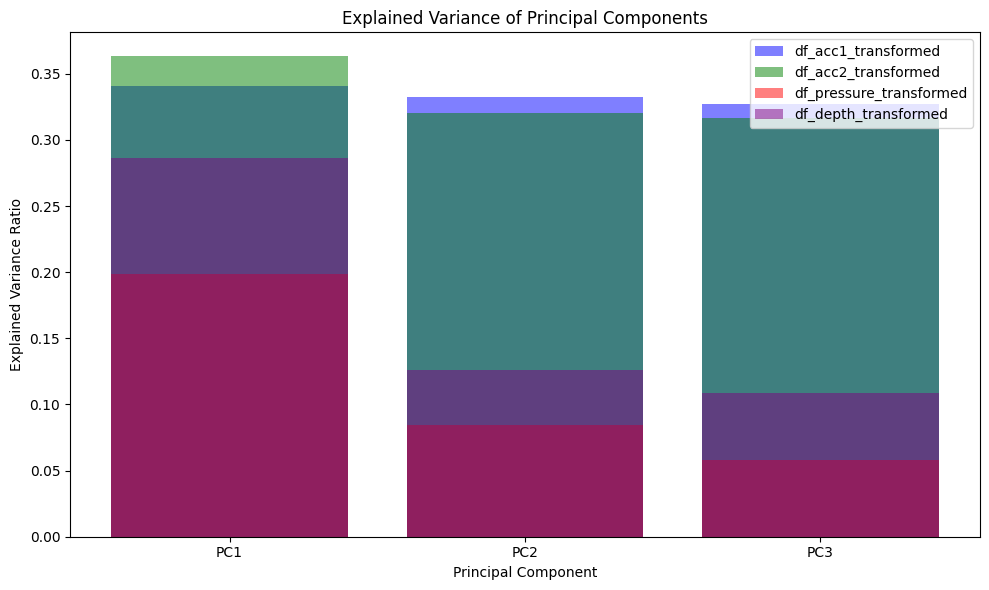

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Store dataframes in a dictionary
dataframes = {
    'df_acc1_transformed': df_acc1_transformed,
    'df_acc2_transformed': df_acc2_transformed,
    'df_pressure_transformed': df_pressure_transformed,
    'df_depth_transformed': df_depth_transformed
}

# Initialize a figure for plotting
plt.figure(figsize=(10, 6))

# Define colors for each dataframe
colors = ['blue', 'green', 'red', 'purple']

# Perform PCA with 3 principal components on each dataframe and plot explained variance
for idx, (name, df) in enumerate(dataframes.items()):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Perform PCA with 3 components
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(scaled_data)

    # Plot explained variance of each component with specified color
    plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.5, label=name, color=colors[idx])

# Add labels and title to the plot
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Principal Components')
plt.xticks(range(1, 4), ['PC1', 'PC2', 'PC3'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
